In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
import math


In [12]:
def Erlang(lam, K, rango):
    return (lam**K * rango**(K-1) * np.exp(-lam*rango)) / math.factorial(K-1)

def PBL(spread):
    p = 0.5 - 0.08*spread
    return np.maximum(p,0)


def PSL(spread):
    p= 0.5 - 0.08*spread
    return np.maximum(p, 0)


    



In [13]:
rango = np.linspace(10, 33, 100)
K = 60
lam = 3
PDF = Erlang(lam, K, rango)

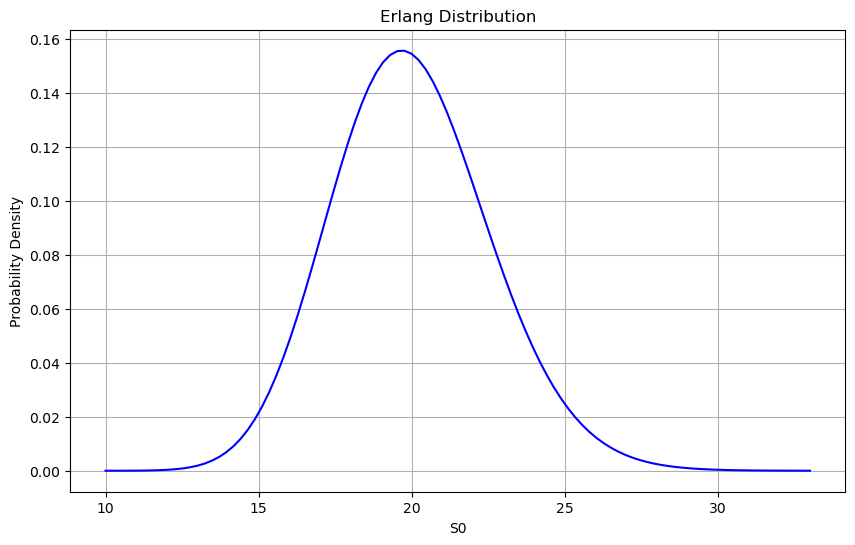

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(rango, Erlang(lam, K, rango), label='Erlang Distribution', color='blue')
plt.title('Erlang Distribution')
plt.xlabel('S0')
plt.ylabel('Probability Density')
plt.grid()

In [15]:
spread = np.linspace(0, 6, 100)
pi_I = 0.4
f = (1-pi_I) * PBL(spread) * spread

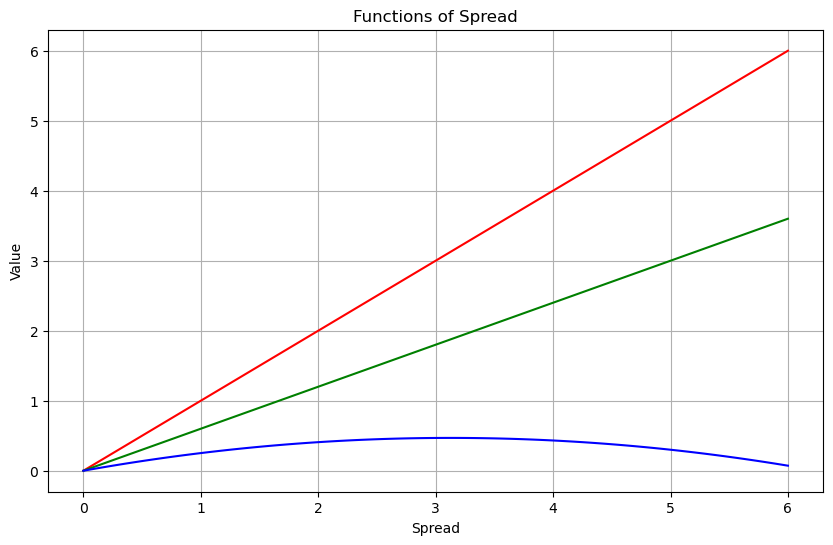

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(spread, spread, color='red', label= 'Q')
plt.plot(spread, spread * (1-pi_I), color='green', label='R')
plt.plot(spread, f, color='blue', label='O')
plt.title('Functions of Spread')
plt.xlabel('Spread')
plt.ylabel('Value')
plt.grid()

In [17]:
S0 = 19.90
KA = 20.5
KB = 18.5

In [18]:
def objective(x):
    KA, KB = x
    
    p1 = (1 - pi_I) * (PBL(KA - S0) * (KA - S0) + PSL(S0 - KB) * (S0 - KB))
    p2 = quad(lambda rango: (rango - KA) * Erlang(lam, K, rango), KA, np.inf)[0]
    p3 = quad(lambda rango: (KB - rango) * Erlang(lam, K, rango), 0, KB)[0]
    return -(p1 - pi_I * (p2 + p3))

In [19]:
x0 = [15, 15]
bounds = [(0, None), (0, None)]
constraint = {'type': 'ineq', 'fun': lambda x: x[0] - x[1]} 
resultado = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraint)

KA_opt, KB_opt = resultado.x
print("Ask optimo:", KA_opt)
print("Bid optimo:", KB_opt)


Ask optimo: 23.428023158237174
Bid optimo: 16.45264382319337


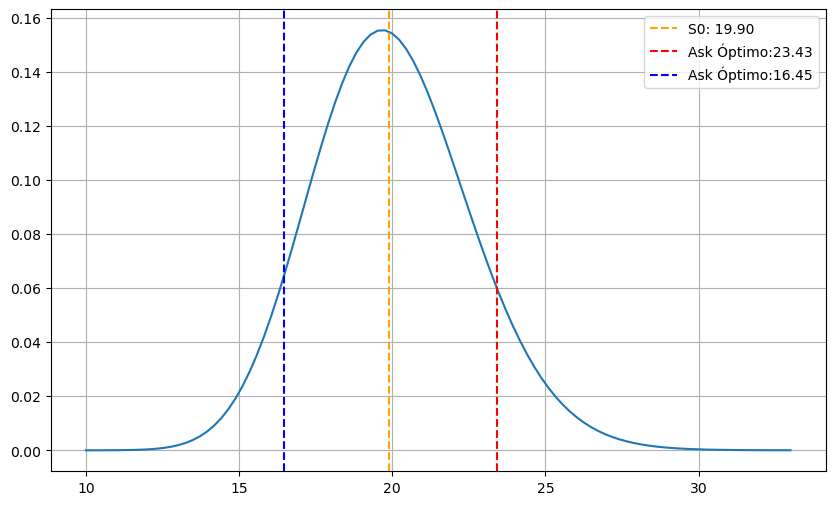

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(rango, PDF)
plt.axvline(S0, color ='orange',linestyle='--', label= f'S0: {S0:.2f}')
plt.axvline(KA_opt, color='red', linestyle='--', label= f'Ask Óptimo:{KA_opt:.2f}')
plt.axvline(KB_opt, color ='blue', linestyle='--', label= f'Ask Óptimo:{KB_opt:.2f}')
plt.grid()
plt.legend()
plt.show()